# Modeling Distributions

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Binomial Distribution

Let's find the distribution of skeet-shooting competition.

In [316]:
np.random.seed(10)
flip = lambda n, p: np.random.choice([1,0], n, p=[p, 1-p])
pd.Series(flip(1000,0.9)).value_counts(normalize=True)

1    0.905
0    0.095
Name: proportion, dtype: float64

Here we define a function that returns us a list of ones or zeros, we can specify the probability of getting 1 with `p` parameter. Also, we can specify how many tries we want using `n` parameter.

In [317]:
sim = lambda n, p: flip(n,p).sum()

Let's think of ones as "the target is hit", and the zeros as "target is missed".

We defined a `sim` function where we can specify the number of tries and the probability of hittin the target, and get the successful hits out of all hits.

In [318]:
n = 25
p = 0.9
results_sim = [sim(n,p) for i in range(1000)]
np.array(results_sim).mean(), n*p

(np.float64(22.496), 22.5)

Out of 25 tries, 22.5 of the shootings were successful on average.

But instead of simulating, we can also calculate the mean by multiplying `n` with `p`. Why? Because skeet-shooting gives us a binomial distribution. But let's compare it to a standard (textbook, no simulations) binomial distribution to see how they look side by side.

Text(0.5, 1.0, 'Simulation results')

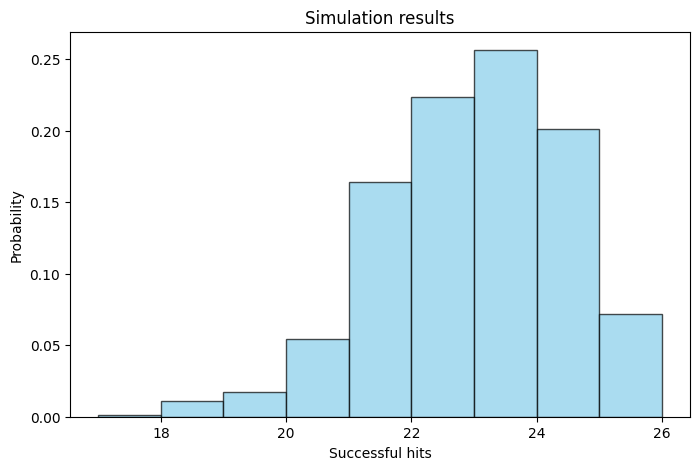

In [319]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(results_sim, bins=np.arange(17,27), density=True, align='mid', color="skyblue", alpha=0.7, edgecolor="black")
ax.set_xlabel("Successful hits")
ax.set_ylabel("Probability")
ax.set_title("Simulation results")

We see a distribution skewed to the left. Let's see how the textbook binomial distribution looks like for `p=0.9`.

In [320]:
from scipy.stats import binom

In [321]:
n, p

(25, 0.9)

In [322]:
x_theoretical = np.arange(0,n+1)
y_theoretical = binom.pmf(x_theoretical, n,p)
theoret_binom_freq = pd.DataFrame(y_theoretical, index=x_theoretical)
theoret_binom_freq

,0
0,1.000000e-25
1,2.250000e-23
2,2.430000e-21
3,1.676700e-19
4,8.299665e-18
5,3.137273e-16
6,9.411820e-15
7,2.299173e-13
8,4.655826e-12
9,7.914904e-11


In [323]:
skeet_freq = pd.Series(results_sim).value_counts(normalize=True).sort_index()
skeet_freq

16    0.001
17    0.001
18    0.011
19    0.017
20    0.054
21    0.164
22    0.223
23    0.256
24    0.201
25    0.072
Name: proportion, dtype: float64

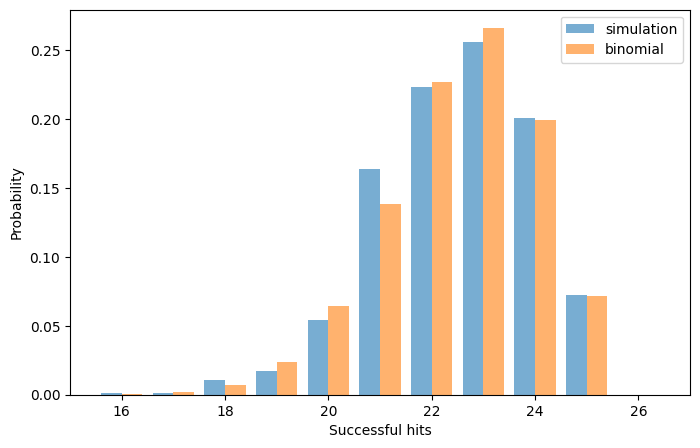

In [324]:
fig, ax = plt.subplots(figsize=(8, 5))
width = 0.4
ax.bar(x=skeet_freq.index - width / 2, height=skeet_freq, width=width, alpha=0.6, label="simulation")
ax.bar(x=theoret_binom_freq.index + width / 2, height=theoret_binom_freq[0],width=width, alpha=0.6, label="binomial")
ax.set_xlabel("Successful hits")
ax.set_ylabel("Probability")
ax.set_xlim((15,27))
ax.legend()
plt.show()

They look very similar. But this is no surprise since we assumed that every shooting have the same success rate.

To put our simulation in a much stronger test, we are going to use real world data.

In [325]:
rw_skeet = pd.read_html("./data/Shooting_at_the_2020_Summer_Olympics_Mens_skeet.html")[6]
rw_skeet

,Rank,Athlete,Country,1,2,3,4,5,Total[3],Shoot-off,Notes
0,1,Éric Delaunay,France,25,25,25,24,25,124,+6,"Q, OR"
1,2,Tammaro Cassandro,Italy,24,25,25,25,25,124,+5,"Q, OR"
2,3,Eetu Kallioinen,Finland,25,25,24,25,24,123,NaN,Q
3,4,Vincent Hancock,United States,25,25,25,25,22,122,+8,Q
4,5,Abdullah Al-Rashidi,Kuwait,25,25,24,25,23,122,+7,Q
5,6,Jesper Hansen,Denmark,25,24,23,25,25,122,+5+8+20,Q
6,7,Jakub Tomeček,Czech Republic,24,25,25,25,23,122,+5+8+19,NaN
7,8,Nicolás Pacheco,Peru,24,24,25,25,24,122,+5+7,NaN
8,9,Georgios Achilleos,Cyprus,25,24,24,25,24,122,+3,NaN
9,10,Gabriele Rossetti,Italy,23,25,24,24,25,121 CB:37,NaN,NaN


Looks like `1,2,3,4,5` columns are the rounds. Let's get all the results and put it in a list.

In [326]:
rw_skeet
rw_flat = rw_skeet[["1","2","3","4","5"]].values.flatten()

In [327]:
rw_success_rate = rw_flat.mean() / 25
rw_success_rate

np.float64(0.9533333333333333)

Real-world success rate is much higher. Let's create a binomial distribution with `p=0.953333`

In [328]:
rw_pmf = pd.Series(rw_flat).value_counts(normalize=True).sort_index()
rw_pmf

19    0.013333
20    0.006667
21    0.006667
22    0.073333
23    0.246667
24    0.313333
25    0.340000
Name: proportion, dtype: float64

In [329]:
x_theoretical = np.arange(0,n+1)
y_theoretical = binom.pmf(x_theoretical, n,rw_success_rate)
binom_pmf = pd.DataFrame(y_theoretical, index=x_theoretical)
binom_pmf

,0
0,5.310917e-34
1,2.712361e-31
2,6.649160e-29
3,1.041385e-26
4,1.170071e-24
5,1.003921e-22
6,6.836221e-21
7,3.790615e-19
8,1.742329e-17
9,6.723177e-16


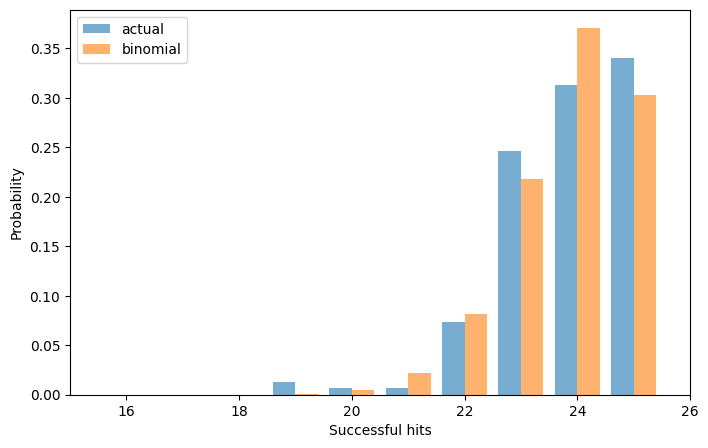

In [330]:
fig, ax = plt.subplots(figsize=(8, 5))
width = 0.4
ax.bar(x=rw_pmf.index - width / 2, height=rw_pmf, width=width, alpha=0.6, label="actual")
ax.bar(x=binom_pmf.index + width / 2, height=binom_pmf[0],width=width, alpha=0.6, label="binomial")
ax.set_xlabel("Successful hits")
ax.set_ylabel("Probability")
ax.set_xlim((15,26))
ax.legend()
plt.show()

Binomial distribution is a good fit for the distribution of the real-world data.

## Poisson Distribution

We will simulate an 60-minute ice hockey game to understand this distribution, assuming that the teams score a total of 6 goals per game.

We can use binomial distribution as usual, let's do it.

In [331]:
n = 3600
m = 6
p = 6/3600
p

0.0016666666666666668

In [332]:
goals_b = np.array([sim(n,p) for i in range(1001)])
goals_b_table = pd.Series(goals_b,np.arange(1001))
goals_b_pmf = goals_b_table.value_counts(normalize=True).sort_index()
goals_b_pmf

1     0.010989
2     0.034965
3     0.079920
4     0.131868
5     0.182817
6     0.169830
7     0.129870
8     0.110889
9     0.063936
10    0.036963
11    0.024975
12    0.016983
13    0.003996
15    0.001998
Name: proportion, dtype: float64

We used binomial distribution perfectly, but using binomial distribution in such rare events is not ideal, I'm going to compare the success rate of getting heads and scoring in an ice-hockey game to demonstrate this.

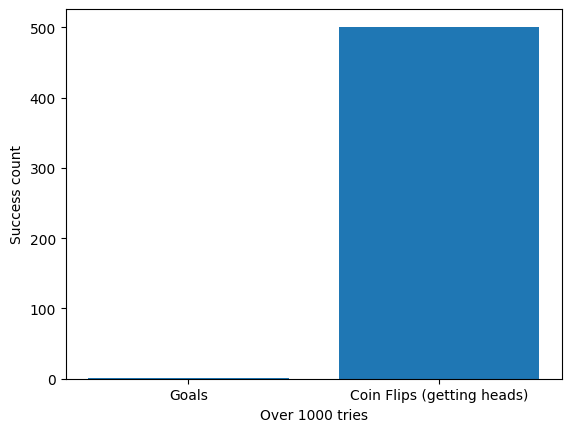

In [333]:
n = 1001
width = 0.5
test_coin = flip(n,0.5)
test_goals = flip(n, p)
test_coin_sum = test_coin.sum()
test_goals_sum = test_goals.sum()

fig, ax = plt.subplots()
ax.bar(x=["Goals", "Coin Flips (getting heads)"], height=[test_goals_sum, test_coin_sum])
ax.set_ylabel("Success count")
ax.set_xlabel("Over 1000 tries")
plt.show()

As you can see, even though we get a decent result, using binomial distribution is not ideal in this sceneario since we have another distribution for this purpose and simulating is expensive when the `n` gets larger.

Poisson distribution PMF formula looks like this:

$$
\begin{gathered}
P(X=x) = \frac{\lambda^x e^{-\lambda}}{x!} \\
x = \text{number of success} \\
\lambda = \text{rate of success}
\end{gathered}
$$

For a binomial distribution, if $n\ge50$ and $p\le0.1$, it approximates to Poisson distribution $Po(np)$.

In the context of ice-hockey game, $\lambda = 6$, and we will have an array ranging from 0 to 20 for the $x$

In [334]:
from scipy.stats import poisson
goals_range = np.arange(0,20)
goals_p_tries = poisson.pmf(goals_range, m)
goals_p_pmf = pd.Series(goals_p_tries, goals_range)
goals_p_pmf

0     0.002479
1     0.014873
2     0.044618
3     0.089235
4     0.133853
5     0.160623
6     0.160623
7     0.137677
8     0.103258
9     0.068838
10    0.041303
11    0.022529
12    0.011264
13    0.005199
14    0.002228
15    0.000891
16    0.000334
17    0.000118
18    0.000039
19    0.000012
dtype: float64

We have our Poission PMF and simulation PMF. Let's plot them to see if Poission distribution is appropriate for this situation.

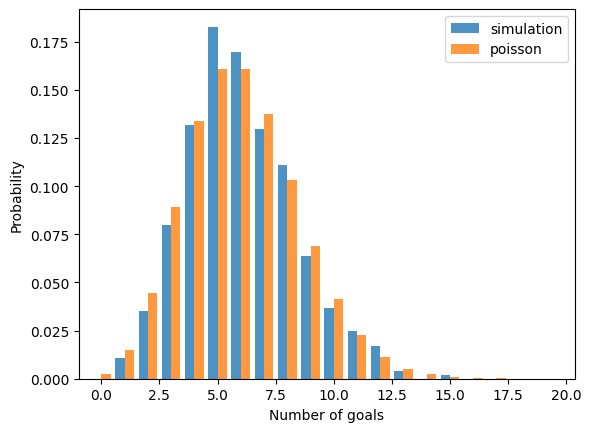

In [335]:
fig, ax = plt.subplots()
width = 0.4

ax.bar(x=goals_b_pmf.index - width / 2, height=goals_b_pmf,width=width, alpha=0.8, label="simulation")
ax.bar(x=goals_p_pmf.index + width / 2, height=goals_p_pmf,width=width, alpha=0.8, label="poisson")
ax.set_xlabel("Number of goals")
ax.set_ylabel("Probability")
ax.legend()
plt.show()

Yes, Poission distribution is very appropriate for this event. To put our model to a stronger test, we can use real world data.

In [336]:
filename = "./data/nhl_2023_2024.hdf"

with pd.HDFStore(filename, "r") as store:
    keys = store.keys()

len(keys), keys[0]

(1312, '/202310100PIT')

We can obtain the goals and when they were scored as follows.

In [337]:
times = pd.read_hdf(filename, key=keys[0])
times

0     424
1    1916
2    2137
3    3005
4    3329
5    3513
dtype: int64

This is for the first game of the season.

To get the total scores of the game, we can use `len()`

In [338]:
len(times)

6

Now let's create a list that has all the scores throughout all the games in the season.

In [339]:
goals_real = []

for key in keys:
    goals_real.append(len(pd.read_hdf(filename, key=key))) 

Now, let's compare the real scores' PMF with the Poisson distribution PMF.

In [340]:
goals_real_df = pd.Series(goals_real)
goals_real_pmf = goals_real_df.value_counts(normalize=True).sort_index()
goals_real_pmf

0     0.002287
1     0.009909
2     0.045732
3     0.070884
4     0.146341
5     0.151677
6     0.185976
7     0.137957
8     0.100610
9     0.072409
10    0.035061
11    0.028963
12    0.008384
13    0.003049
17    0.000762
Name: proportion, dtype: float64

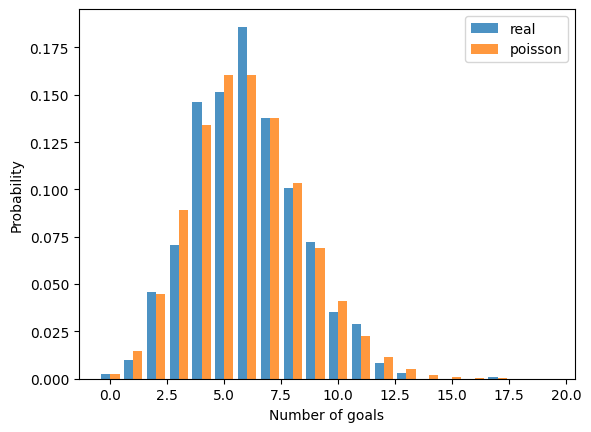

In [341]:
fig, ax = plt.subplots()
width = 0.4

ax.bar(x=goals_real_pmf.index - width / 2, height=goals_real_pmf,width=width, alpha=0.8, label="real")
ax.bar(x=goals_p_pmf.index + width / 2, height=goals_p_pmf,width=width, alpha=0.8, label="poisson")
ax.set_xlabel("Number of goals")
ax.set_ylabel("Probability")
ax.legend()
plt.show()

The Poisson distribution also fits real-world data, meaning we can use the Poisson distribution to model the distribution of hockey scores.

## The Exponential Distribution

We found the average number of goals in a hockey game. But the first goal timing follows the exponential distribution. Let's see how.

In [342]:
n = 3600
m = 6
p = m / 3600
p

0.0016666666666666668

In [343]:
np.random.seed(100)
simulate_first_goal = lambda n, p : pd.Series(flip(n,p)).argmax()
first_goal_times = [simulate_first_goal(n,p) for i in range(1001)]
first_goal_sim_cdf = pd.Series(first_goal_times).value_counts(normalize=True).sort_index().cumsum()
first_goal_sim_cdf

0       0.004995
1       0.006993
2       0.008991
5       0.009990
6       0.013986
          ...   
3098    0.996004
3201    0.997003
3341    0.998002
3563    0.999001
3567    1.000000
Name: proportion, Length: 689, dtype: float64

In [344]:
mean = np.mean(first_goal_times)
mean

np.float64(567.6223776223776)

You can look up formulas of the exponential distribution from its [Wikipedia page](https://en.wikipedia.org/wiki/Exponential_distribution). In this section we will use the below formulas:

$$
\begin{gathered}
\text{Mean} = \frac{1}{\lambda} \\
\text{CDF} = 1 - e^{-\lambda x}
\end{gathered}
$$

$\lambda$ represents the rate at which events occur. So we can flip the formula to find the lambda.

In [345]:
lam = 1/mean
lam

np.float64(0.0017617346310213134)

Here, lambda represents how many goals are scored each second. Which is 0.0016 goal/second.

In [346]:
first_goal_lam = 1 / mean
cdf_aggregator = lambda lam, x : 1 - np.exp(-lam * x)
cdf_size = 3600
cdf_ticks = np.linspace(0,3600,cdf_size)
first_goal_expo_model = pd.Series([cdf_aggregator(tick, lam) for tick in cdf_ticks], index=cdf_ticks)
first_goal_expo_model

0.000000       0.000000
1.000278       0.001761
2.000556       0.003518
3.000834       0.005273
4.001111       0.007024
                 ...   
3595.998889    0.998227
3596.999166    0.998230
3597.999444    0.998233
3598.999722    0.998237
3600.000000    0.998240
Length: 3600, dtype: float64

Or we can just use scipy's `expon` function.

In [347]:
from scipy.stats import expon
 
first_goal_expo_model = pd.Series(data=expon.cdf(cdf_ticks, scale=mean), index=cdf_ticks)
first_goal_expo_model

0.000000       0.000000
1.000278       0.001761
2.000556       0.003518
3.000834       0.005273
4.001111       0.007024
                 ...   
3595.998889    0.998227
3596.999166    0.998230
3597.999444    0.998233
3598.999722    0.998237
3600.000000    0.998240
Length: 3600, dtype: float64

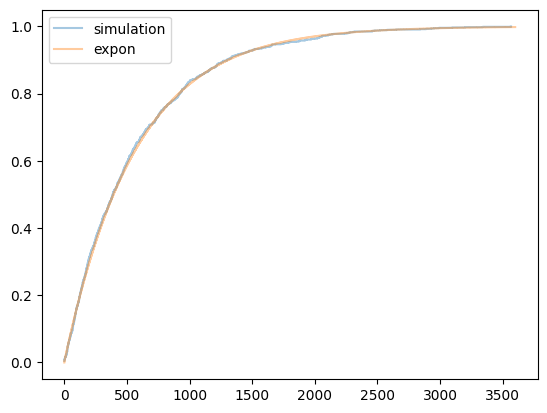

In [348]:
fig, ax = plt.subplots()
ax.step(x=first_goal_sim_cdf.index, y=first_goal_sim_cdf,alpha=0.4, label="simulation")
ax.step(x=first_goal_expo_model.index, y=first_goal_expo_model, alpha=0.4, label="expon")
ax.legend()
plt.show()

It matches up perfectly with the exponential distribution model.

## Normal Distribution

Most things we measure in the real world follow a normal distribution. To test this, let's consider a model of the way giant pumpkins grow.

Suppose that each day, pumpkin grows 1 pound if the weather is bad, 2 pounds if the weather is fair, and 3 pounds if the weather is good.

In [349]:
simulate_growth = lambda n : np.random.choice([1,2,3], n).sum()

We will use this function to calculate the total weight gains over `n` days.

In [350]:
sim_weights = [simulate_growth(100) for i in range(2000)]
sim_weights

[np.int64(195),
 np.int64(207),
 np.int64(200),
 np.int64(203),
 np.int64(192),
 np.int64(203),
 np.int64(200),
 np.int64(195),
 np.int64(204),
 np.int64(205),
 np.int64(189),
 np.int64(195),
 np.int64(211),
 np.int64(206),
 np.int64(186),
 np.int64(217),
 np.int64(208),
 np.int64(201),
 np.int64(205),
 np.int64(210),
 np.int64(198),
 np.int64(207),
 np.int64(199),
 np.int64(211),
 np.int64(208),
 np.int64(204),
 np.int64(192),
 np.int64(202),
 np.int64(194),
 np.int64(205),
 np.int64(194),
 np.int64(202),
 np.int64(209),
 np.int64(201),
 np.int64(192),
 np.int64(201),
 np.int64(205),
 np.int64(200),
 np.int64(196),
 np.int64(181),
 np.int64(200),
 np.int64(209),
 np.int64(201),
 np.int64(209),
 np.int64(196),
 np.int64(203),
 np.int64(210),
 np.int64(197),
 np.int64(196),
 np.int64(184),
 np.int64(204),
 np.int64(188),
 np.int64(199),
 np.int64(193),
 np.int64(212),
 np.int64(193),
 np.int64(196),
 np.int64(205),
 np.int64(202),
 np.int64(180),
 np.int64(186),
 np.int64(205),
 np.int6

Here we simulated 1001 pumpkins over 100 days. Let's also create the CDF of this `sim_wights`.

In [351]:
sim_weights_cdf = pd.Series(sim_weights).value_counts(normalize=True).sort_index().cumsum()
sim_cdf_size = sim_weights_cdf.count()
sim_weights_cdf

173    0.0005
175    0.0010
176    0.0015
178    0.0025
179    0.0035
180    0.0070
181    0.0095
182    0.0125
183    0.0190
184    0.0305
185    0.0405
186    0.0495
187    0.0640
188    0.0830
189    0.1010
190    0.1190
191    0.1445
192    0.1805
193    0.2050
194    0.2440
195    0.2845
196    0.3230
197    0.3660
198    0.4130
199    0.4570
200    0.5045
201    0.5465
202    0.5950
203    0.6415
204    0.6835
205    0.7345
206    0.7695
207    0.8100
208    0.8360
209    0.8670
210    0.8875
211    0.9140
212    0.9390
213    0.9500
214    0.9605
215    0.9720
216    0.9765
217    0.9855
218    0.9890
219    0.9915
220    0.9940
221    0.9960
222    0.9975
223    0.9980
224    0.9990
228    0.9995
232    1.0000
Name: proportion, dtype: float64

For real-world plotting, plotting from negative to positive inifinity is impractical. We are only going to use the curev between $\mu - 4\sigma$ to $\mu + 4\sigma$ for this example.

In [352]:
mean, std = np.mean(sim_weights), np.std(sim_weights)
low, high = mean - 4*std, mean + 4*std
print(mean,std)
print(low,high)

200.303 8.235240797936635
167.36203680825346 233.24396319174653


In [353]:
x_ticks = np.linspace(low,high,sim_cdf_size)
x_ticks

array([167.36203681, 168.65383929, 169.94564176, 171.23744424,
       172.52924672, 173.8210492 , 175.11285168, 176.40465416,
       177.69645663, 178.98825911, 180.28006159, 181.57186407,
       182.86366655, 184.15546902, 185.4472715 , 186.73907398,
       188.03087646, 189.32267894, 190.61448141, 191.90628389,
       193.19808637, 194.48988885, 195.78169133, 197.0734938 ,
       198.36529628, 199.65709876, 200.94890124, 202.24070372,
       203.5325062 , 204.82430867, 206.11611115, 207.40791363,
       208.69971611, 209.99151859, 211.28332106, 212.57512354,
       213.86692602, 215.1587285 , 216.45053098, 217.74233345,
       219.03413593, 220.32593841, 221.61774089, 222.90954337,
       224.20134584, 225.49314832, 226.7849508 , 228.07675328,
       229.36855576, 230.66035824, 231.95216071, 233.24396319])

In [354]:
from scipy.stats import norm
norm_dist = norm.cdf(x_ticks, loc=mean, scale=std)
norm_dist_cdf = pd.Series(norm_dist, index=x_ticks)
norm_dist_cdf

167.362037    0.000032
168.653839    0.000061
169.945642    0.000114
171.237444    0.000208
172.529247    0.000372
173.821049    0.000651
175.112852    0.001111
176.404654    0.001854
177.696457    0.003025
178.988259    0.004823
180.280062    0.007521
181.571864    0.011468
182.863667    0.017102
184.155469    0.024952
185.447272    0.035622
186.739074    0.049773
188.030876    0.068086
189.322679    0.091211
190.614481    0.119703
191.906284    0.153957
193.198086    0.194139
194.489889    0.240131
195.781691    0.291496
197.073494    0.347471
198.365296    0.406990
199.657099    0.468742
200.948901    0.531258
202.240704    0.593010
203.532506    0.652529
204.824309    0.708504
206.116111    0.759869
207.407914    0.805861
208.699716    0.846043
209.991519    0.880297
211.283321    0.908789
212.575124    0.931914
213.866926    0.950227
215.158728    0.964378
216.450531    0.975048
217.742333    0.982898
219.034136    0.988532
220.325938    0.992479
221.617741    0.995177
222.909543 

Let's plot them and see if the normal distribution model fits to the simulation.

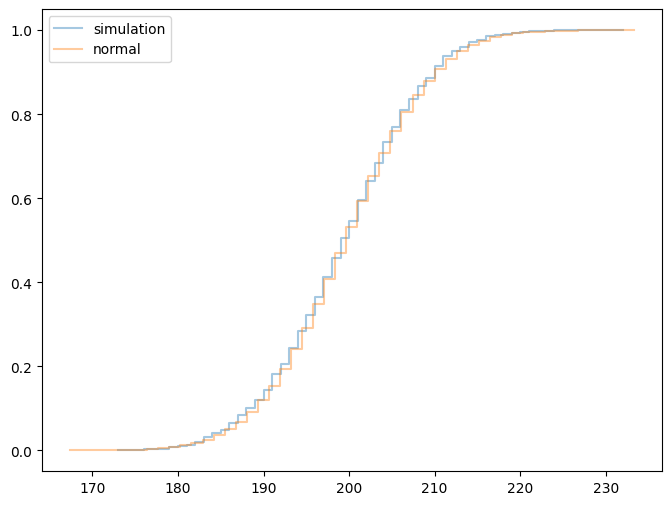

In [355]:
fig, ax = plt.subplots(figsize=(8,6))
ax.step(sim_weights_cdf.index,sim_weights_cdf,label="simulation", alpha=0.4)
ax.step(norm_dist_cdf.index, norm_dist_cdf,label="normal", alpha=0.4)
ax.legend()
plt.show()

Because our data is discrete, it is much more appropriate to use a `.step()`, but when te sample size is small, it makes it hard to read.

In this situation, we can use the `.plot()` function the create a line plot.

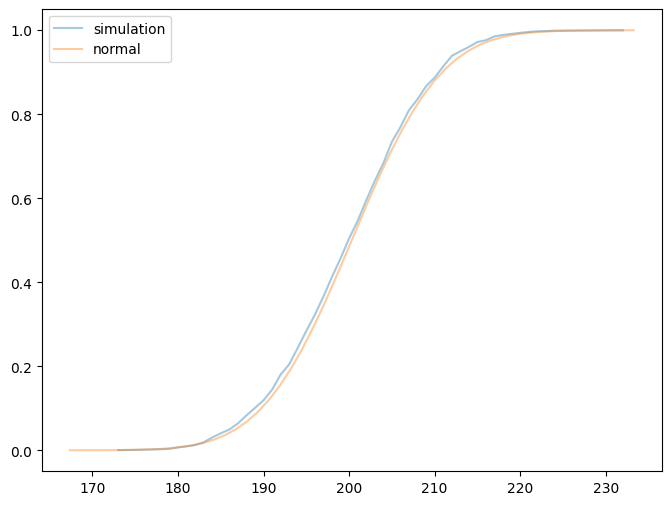

In [356]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(sim_weights_cdf.index,sim_weights_cdf,label="simulation", alpha=0.4)
ax.plot(norm_dist_cdf.index, norm_dist_cdf,label="normal", alpha=0.4)
ax.legend()
plt.show()

The normal distribution fits our simulation very well.

In general, when we add up enough random variables, the sum tends to follow a normal distribution, as the consequence of CLT (Central Limit Theorem).

### NSFG Data

Let's see how we see normal distribution in the real-world data.

In [357]:
preg = pd.read_csv("./data/2002FemPreg_after_01.csv")
preg

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125,3.997283
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750,3.572040
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250,4.139030
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000,3.175147
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875,2.806603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,6.1875,2.806603
13589,12571,2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,NaN,NaN
13590,12571,3,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,NaN,NaN
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,4670.540953,5795.692880,6269.200989,1,78,1227,7.5000,3.401943


We will use the birth weights column.

In [358]:
total_weights = preg["totalwgt_kg"].dropna()
total_weights

0        3.997283
1        3.572040
2        4.139030
3        3.175147
4        2.806603
           ...   
13581    2.891651
13584    2.891651
13588    2.806603
13591    3.401943
13592    3.401943
Name: totalwgt_kg, Length: 9083, dtype: float64

To eliminate the extreme values (outliers), we will use `trimboth`.

In [359]:
from scipy.stats import trimboth

trimmed_weights = trimboth(total_weights, 0.01)

Let's also create the CDF for the total weights.

In [360]:
trimmed_weights_s = pd.Series(trimmed_weights)
trimmed_weights_cdf = trimmed_weights_s.value_counts(normalize=True).sort_index().cumsum()

Let's create a normal distribution with the same parameters as our weights dataset.

In [361]:
mean, std = np.mean(trimmed_weights), np.std(trimmed_weights)
low, high = mean - std*4, mean + std*4

x_ticks = np.linspace(low,high,500)
x_ticks
norm_dist_cdf_arr = norm.cdf(x_ticks, mean, std)
norm_dist_cdf = pd.Series(norm_dist_cdf_arr, index=x_ticks)
norm_dist_cdf

1.021660    0.000032
1.030831    0.000034
1.040002    0.000036
1.049174    0.000039
1.058345    0.000041
              ...   
5.561344    0.999959
5.570515    0.999961
5.579686    0.999964
5.588857    0.999966
5.598028    0.999968
Length: 500, dtype: float64

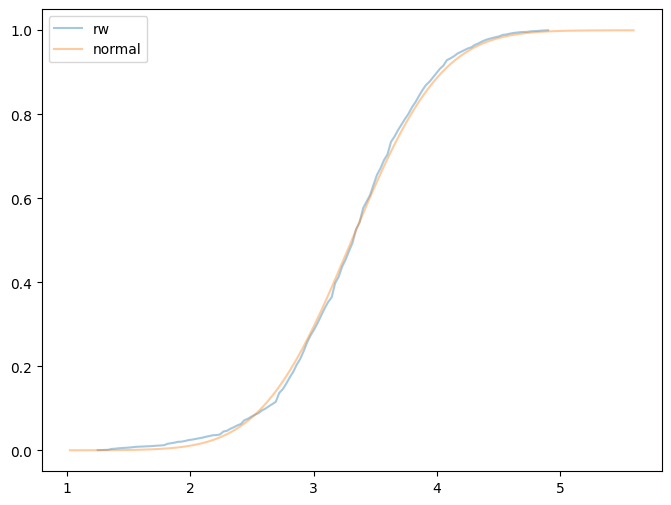

In [362]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(trimmed_weights_cdf.index,trimmed_weights_cdf,label="rw", alpha=0.4)
ax.plot(norm_dist_cdf.index, norm_dist_cdf,label="normal", alpha=0.4)
ax.legend()
plt.show()

Normal model fits the data well except below 3 kilograms. It can be interpreted as lightest babies are lighter than we'd expect.